In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "..")
from packages.alphastable import alphastable, get_alpha_cdf, get_alpha_char

In [2]:
Image_width = 10
if 0:
    plt.rc('text', usetex = True) # latex ticks
    plt.rc('text.latex')
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ['Computer Modern'],
    })

    EXTRA_SMALL = 10
    SMALL_SIZE = 12
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 20

    plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
Alpha = [0.75, 1.5]
Beta = [-1, -0.5, 0.5, 1]
Gam = [0.5, 1]
delta = 0
MC = 100
N = 1000
perc_cdf_tail = 0.05
t = np.linspace(0.01, 3, N)

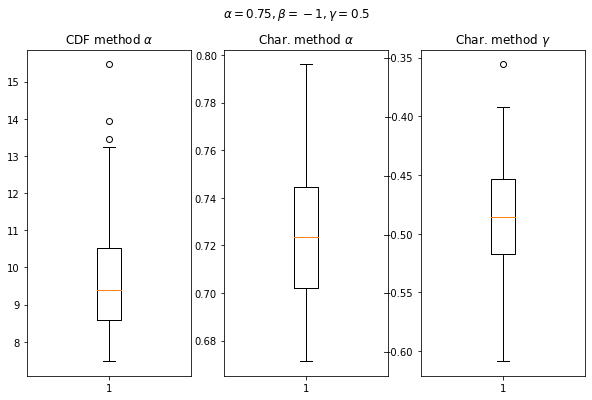

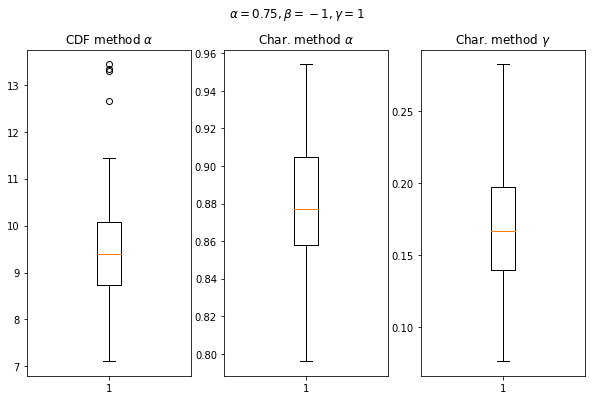

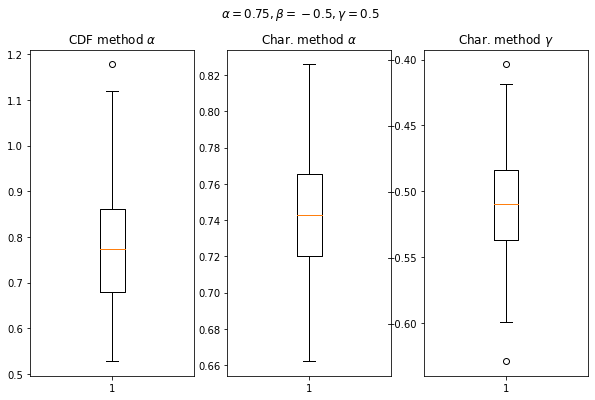

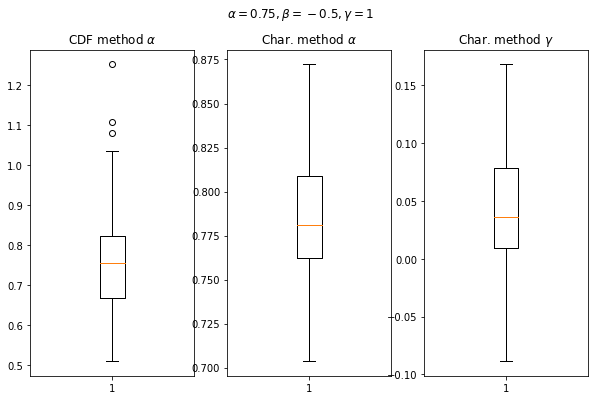

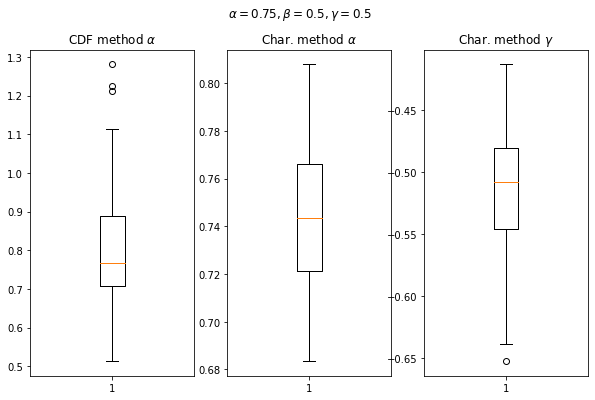

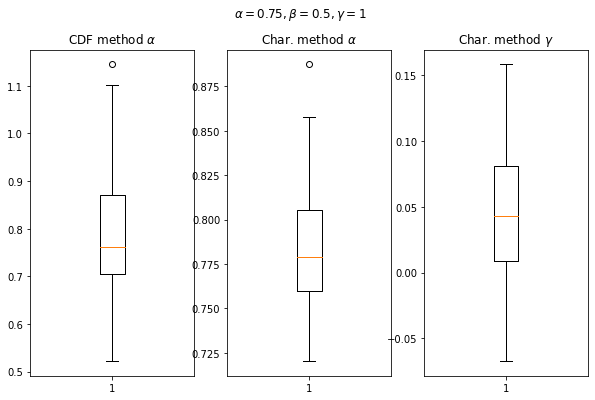

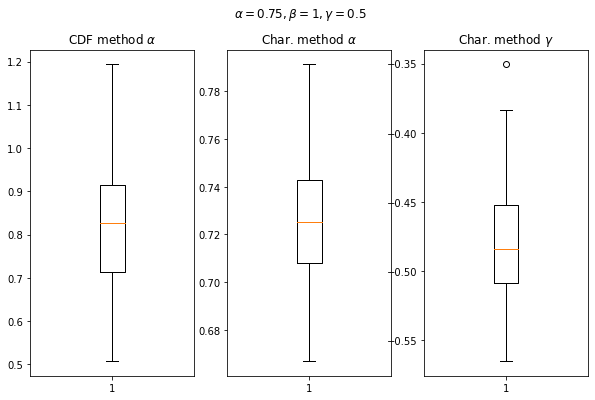

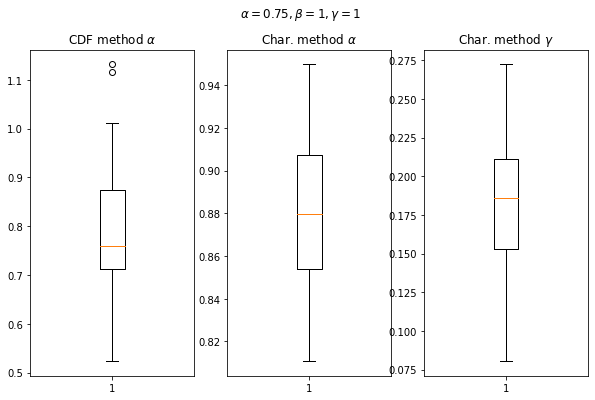

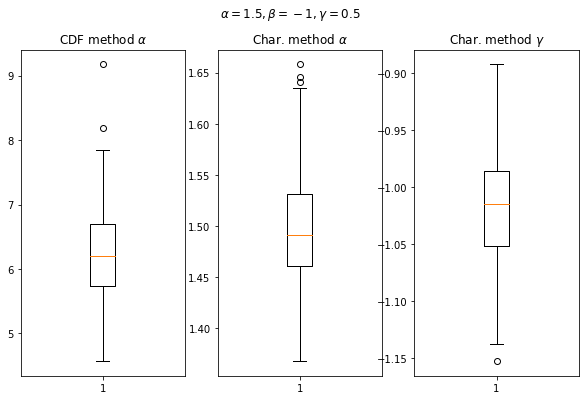

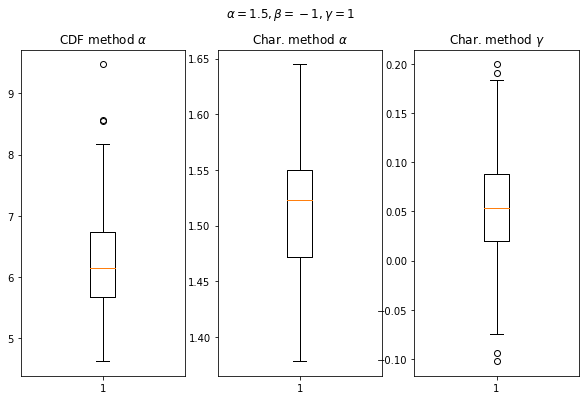

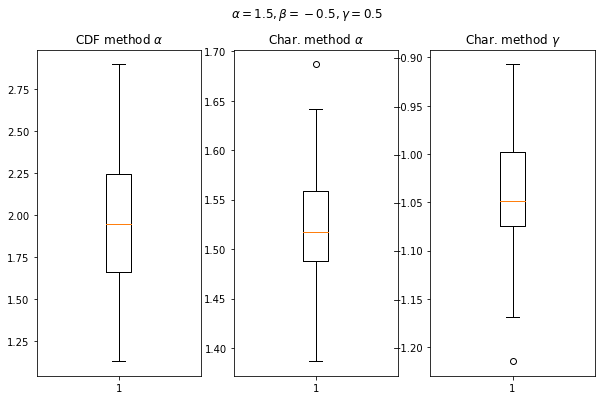

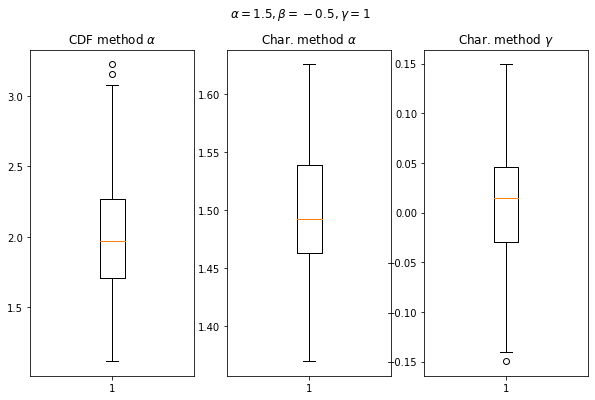

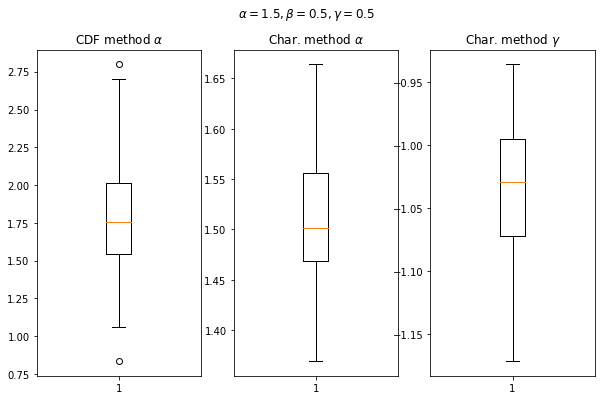

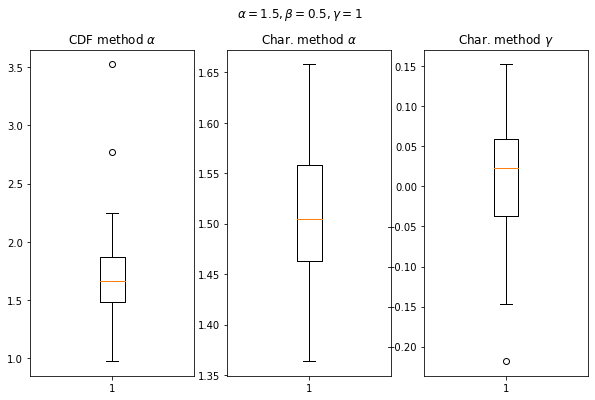

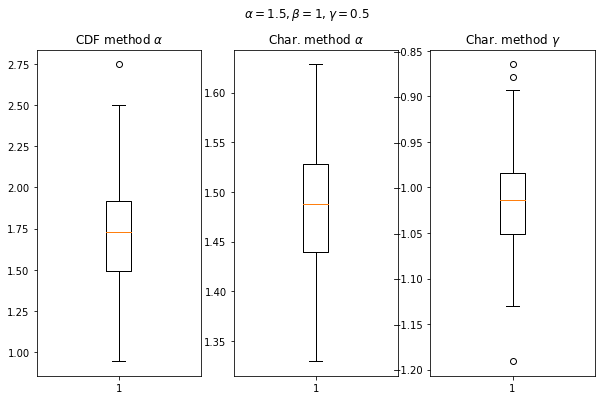

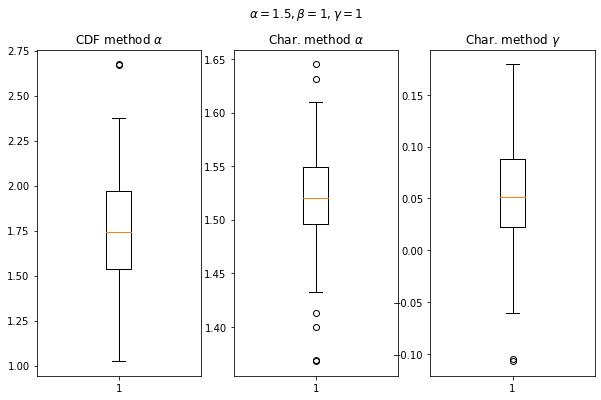

In [5]:
for a, alpha in enumerate(Alpha):
    for b, beta in enumerate(Beta):
        for g, gamma in enumerate(Gam):
            Alphas_MC_cdf = np.ones(MC)
            Alphas_MC_char = np.ones(MC)
            Gamma_MC_char = np.ones(MC)
            for step in range(MC):
                alphastable_vector = np.squeeze(alphastable(N, 1, alpha, beta, gamma, delta, 0))
                alpha_cdf_estimator = get_alpha_cdf(alphastable_vector, perc_cdf_tail)
                alpha_char_estimator, gamma_char_estimator = get_alpha_char(alphastable_vector, t)
                Alphas_MC_cdf[step] = alpha_cdf_estimator
                Alphas_MC_char[step] = alpha_char_estimator
                Gamma_MC_char[step] = gamma_char_estimator
            fig, axs = plt.subplots(ncols = 3, figsize = (Image_width, 0.6 * Image_width))
            axs[0].boxplot(Alphas_MC_cdf)
            axs[0].set_title("CDF method $\\alpha$")
            axs[1].boxplot(Alphas_MC_char)
            axs[1].set_title("Char. method $\\alpha$")
            axs[2].boxplot(Gamma_MC_char)
            axs[2].set_title("Char. method $\\gamma$")
            fig.suptitle(f"$\\alpha = {alpha}, \\beta = {beta}, \\gamma = {gamma}$")